# import modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# helper functions (if needed)

In [2]:
# python code...

# read training data into data frame

In [2]:
train_data = pd.read_csv('train.csv')
print(train_data)

       age         workclass     education  education-num      marital-status  \
0       39         State-gov     Bachelors             13       Never-married   
1       50  Self-emp-not-inc     Bachelors             13  Married-civ-spouse   
2       38           Private       HS-grad              9            Divorced   
3       53           Private          11th              7  Married-civ-spouse   
4       37           Private       Masters             14  Married-civ-spouse   
...    ...               ...           ...            ...                 ...   
26044   43           Private     Assoc-voc             11  Married-civ-spouse   
26045   32           Private       Masters             14       Never-married   
26046   53           Private       Masters             14  Married-civ-spouse   
26047   22           Private  Some-college             10       Never-married   
26048   40           Private       HS-grad              9  Married-civ-spouse   

              occupation   

# analyze and visualize data to find candidate features

<AxesSubplot: xlabel='education'>

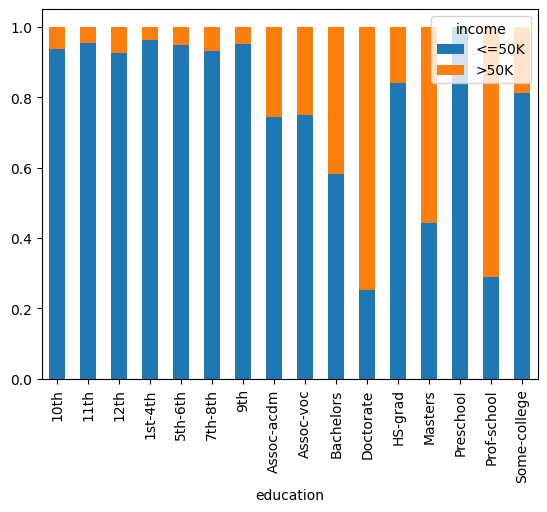

In [3]:
# show first few rows of data
train_data.head()

# get summary statistics for numerical columns
train_data.describe()

# count number of unique values in each categorical column
train_data.select_dtypes(include='object').nunique()

# plot a bar chart of education vs percentage within income “>50K”
train_data.groupby(['education', 'income']).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True)


# split training data into features (X) and targets (y)

In [5]:
X_train = train_data.drop('income', axis=1)
y_train = train_data['income']

# convert categorical data from strings to integers 

In [6]:
# create a copy of X_train
X_train_encoded = X_train.copy()

# convert categorical columns to integers using LabelEncoder
le = LabelEncoder()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    X_train_encoded[col] = le.fit_transform(X_train[col])


# experiment w/ classifying training data using various feature sets

In [7]:
# python code...

# analyze and visualize experimental results

# Question: What features work "best"?  Why?

answer goes here

# create "best" classification model based on training data

In [8]:
# python code...

# read in test data 

In [9]:
# python code...

# use model to make predictions of test data

In [10]:
# python code...

# write test data with predicted labels

In [11]:
# python code...